# Recreate plots from published paper

Below are two plots I cut from a published [paper](https://www.nature.com/articles/s41586-024-07410-3), we will learn how to create similar plots in this session.

![05-fig-01](figs/05_addlabel_fig_01.png)

## Add data labels to scatter plot

First, let's learn how to add data labels to a scatter plot using Matplotlib.

### Using `text()`

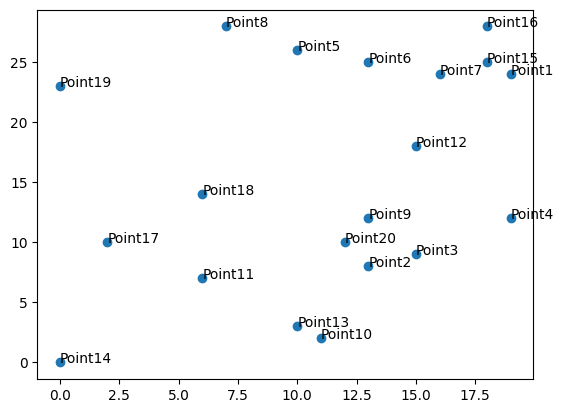

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(66)
x = np.random.randint(20, size=20)
y = np.random.randint(30, size=20)
z = []

for i in range(1,21):
    z.append("Point" + str(i))

fig, ax = plt.subplots()
plt.scatter(x, y)

for i, txt in enumerate(z):
    ax.text(x[i], y[i], txt)

plt.show()

### Using `annotate()`

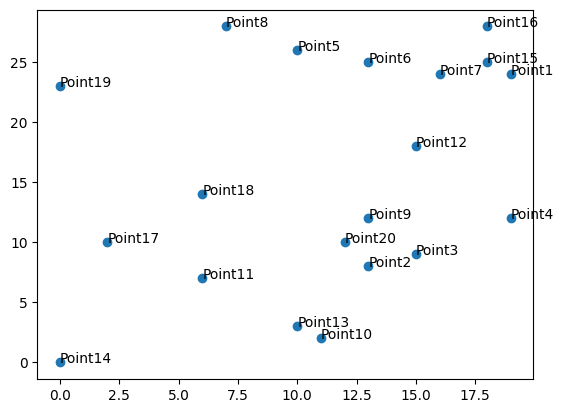

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(66)
x = np.random.randint(20, size=20)
y = np.random.randint(30, size=20)
z = []

for i in range(1,21):
    z.append("Point" + str(i))

fig, ax = plt.subplots()
plt.scatter(x, y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]))

plt.show()

In [3]:
import seaborn as sns

### Arrowprops in the `annotate()` function

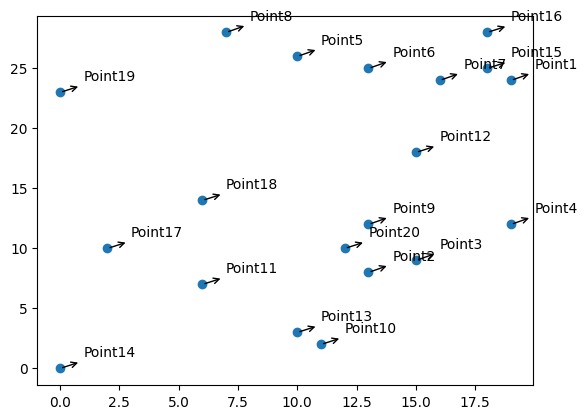

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(66)
x = np.random.randint(20, size=20)
y = np.random.randint(30, size=20)
z = []

for i in range(1,21):
    z.append("Point" + str(i))

fig, ax = plt.subplots()
plt.scatter(x, y)

for i, txt in enumerate(z):
    ax.annotate(txt, (x[i], y[i]), xytext=(x[i]+1, y[i]+1),
               arrowprops=dict(arrowstyle="<-"))

plt.show()

### Using `adjust_text()`

Sometimes we are going to encounter overlapping labels when there are a lot of data points, and `adjust_text()` function is here to solve this problem. 

In [5]:
!pip install adjustText

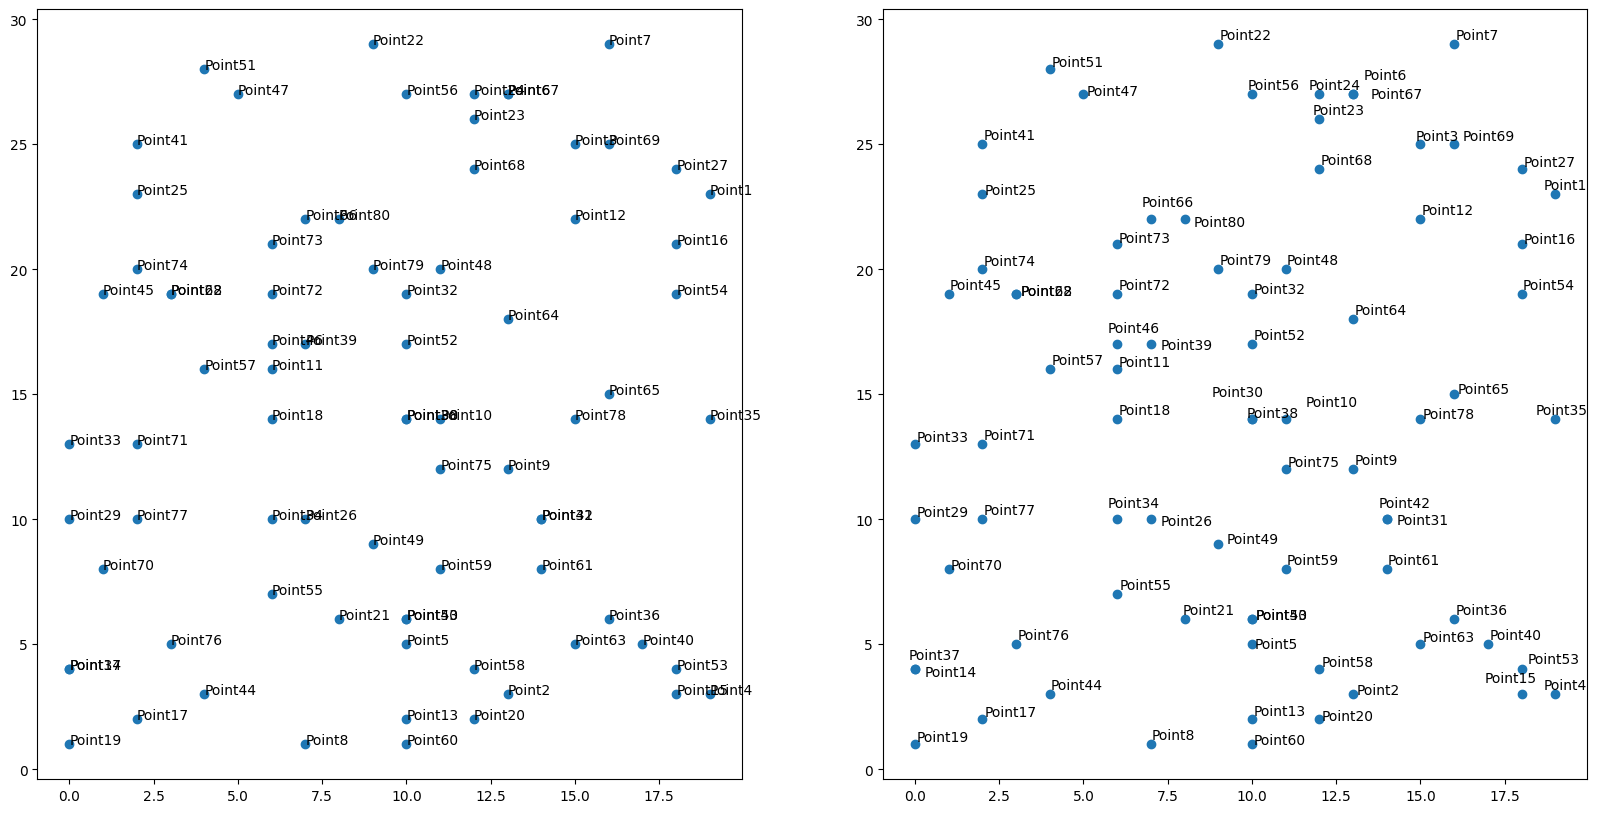

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# create the data 
np.random.seed(66)
x = np.random.randint(20, size=80)
y = np.random.randint(30, size=80)
z = []
for i in range(1,81):
    z.append("Point" + str(i))

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x,y)
ax2.scatter(x,y)

for i,txt in enumerate(z):
    ax1.annotate(txt, (x[i], y[i]))

ax2 = [ax2.annotate(txt, (x[i], y[i])) for i,txt in enumerate(z)]
adjust_text(ax2)
plt.show()

## How to add labels only for certain dots

Above we have learned how to add labels for each of the dots on our plot. Now, let's learn how to only add a few of them, especially the important ones. 

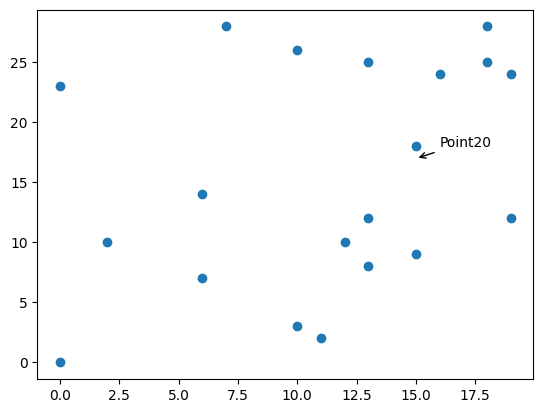

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(66)
x = np.random.randint(20, size=20)
y = np.random.randint(30, size=20)
z = []

for i in range(1,21):
    z.append("Point" + str(i))

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.annotate('Point20', xy=(15, 17), xytext=(15+1, 17+1), arrowprops=dict(arrowstyle='->'))
plt.show()

You can adjust the value of `xytext=()` to change the location of the label. 

__Exercise: add label for "Point15" and "Point20".__

In [8]:
x[0]

19

## Draw a line graph with confidence intervals

Seaborn has a function called `pointplot()` which encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Like the example below:

<Axes: xlabel='class', ylabel='survived'>

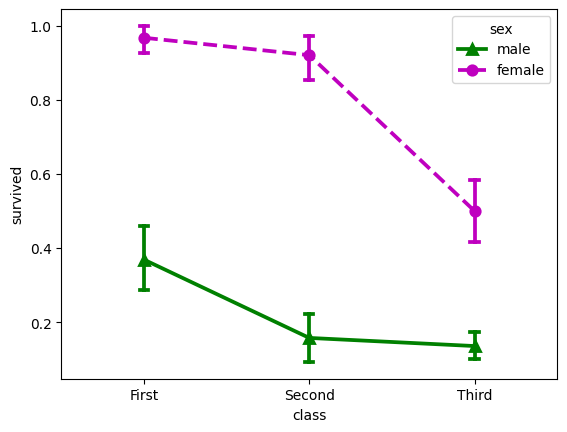

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset("titanic")
fig, ax = plt.subplots()
sns.pointplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"], capsize=.05,
    ax=ax
)

__Exercise: change the color of the lines.__

__Question: what is `capsize=.05`?__

In [10]:
sns.set_theme(style="white")

## Draw a bar plot

A bar plot represents an aggregate or statistical estimate for a numeric variable with the height of each rectangle and indicates the uncertainty around that estimate using an error bar. Bar plots include 0 in the axis range, and they are a good choice when 0 is a meaningful value for the variable to take.

<Axes: xlabel='island', ylabel='body_mass_g'>

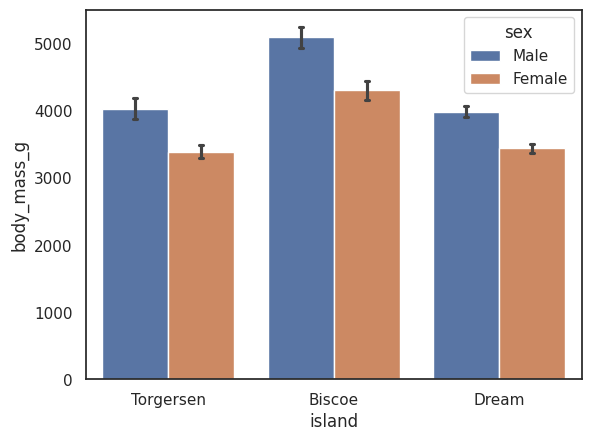

In [11]:
penguins = sns.load_dataset("penguins")
sns.barplot(penguins, x="island", y="body_mass_g", hue="sex", capsize=.05)

__Exercise: read this [page](https://seaborn.pydata.org/generated/seaborn.barplot.html), and find how to change the thickness of the error bar line.__

<Axes: xlabel='island', ylabel='body_mass_g'>

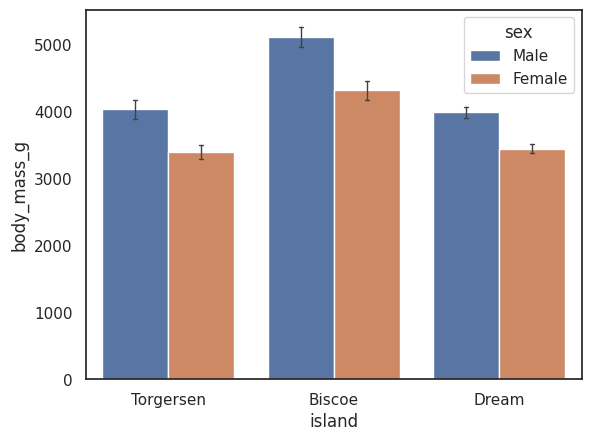

In [12]:
sns.barplot(penguins, x="island", y="body_mass_g", hue="sex", capsize=.05, err_kws={'linewidth': 1})

__Exercise: change the color of the bars.__

<Axes: xlabel='island', ylabel='body_mass_g'>

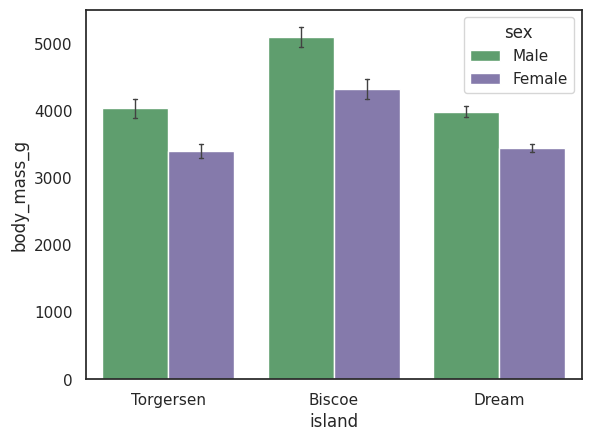

In [13]:
sns.barplot(penguins, x="island", y="body_mass_g", hue="sex", capsize=.05, 
            err_kws={'linewidth': 1}, palette={"Male": "g", "Female": "m"})

## Draw a strip plot

A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

<Axes: xlabel='total_bill', ylabel='day'>

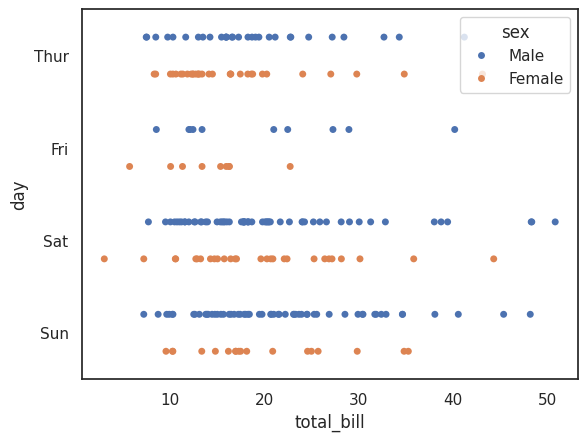

In [14]:
tips = sns.load_dataset("tips")
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False)

__Exercise: make this plot vertical and jitter the dots.__

<Axes: xlabel='day', ylabel='total_bill'>

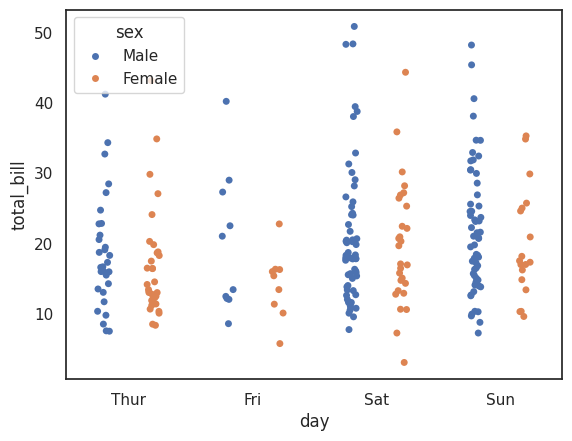

In [15]:
sns.stripplot(data=tips, x="day", y="total_bill", hue="sex", dodge=True, jitter=True)

__Question: what is `dodge=True`?__

<Axes: xlabel='day', ylabel='total_bill'>

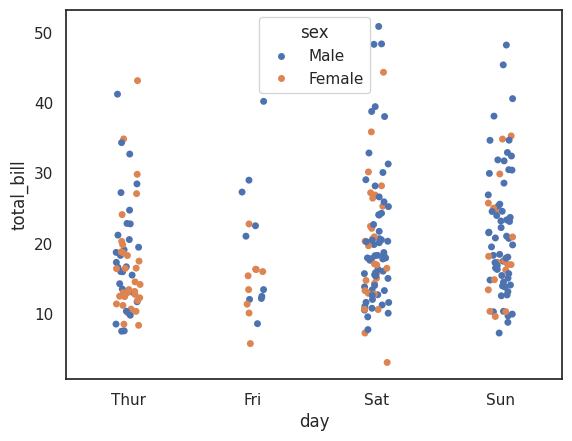

In [16]:
sns.stripplot(data=tips, x="day", y="total_bill", hue="sex", dodge=False, jitter=True)

__Exercise: read this [page](https://seaborn.pydata.org/generated/seaborn.stripplot.html), and change the colour, shape, size, and transparency of the dots.__

<Axes: xlabel='day', ylabel='total_bill'>

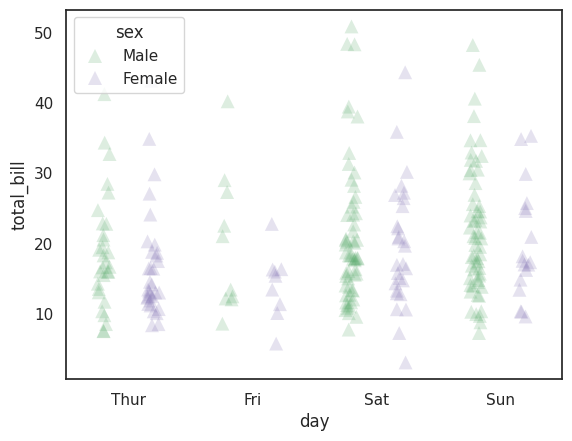

In [17]:
sns.stripplot(data=tips, x="day", y="total_bill", hue="sex", dodge=True, jitter=True,
             palette={"Male": "g", "Female": "m"}, marker="^", size=10, alpha=.2)

## Draw a swarm plot

This function is similar to `stripplot()`, but the points are adjusted (only along the categorical axis) so that they don't overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a "beeswarm". 

A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution. 

<Axes: xlabel='total_bill', ylabel='day'>

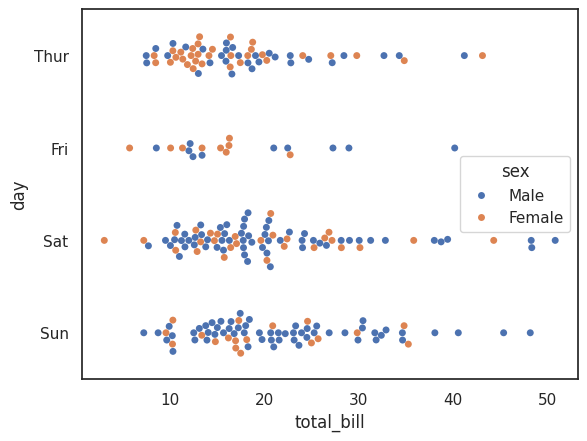

In [18]:
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex")

__Exercise: separate the orange dots and blue dots to two rows.__

<Axes: xlabel='total_bill', ylabel='day'>

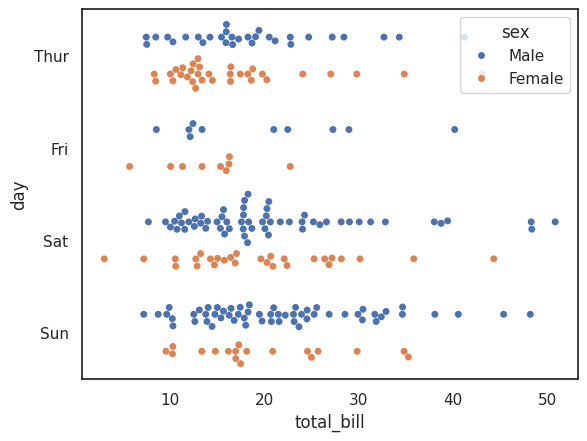

In [19]:
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True)

## Draw 2 plots on the same axes

<Axes: xlabel='total_bill', ylabel='day'>

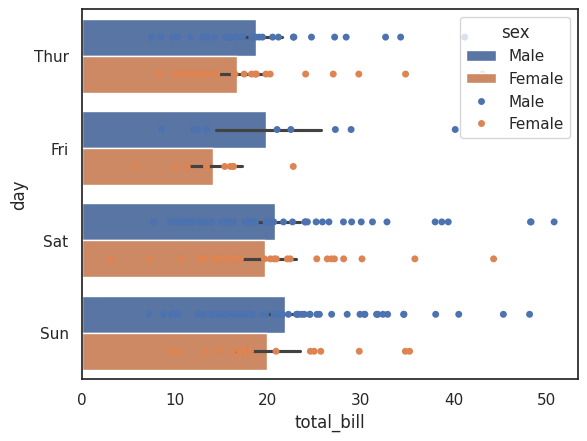

In [20]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

__Exercise: draw a boxplot and a swarmplot on the same axes, using the same dataset.__

<Axes: xlabel='total_bill', ylabel='day'>

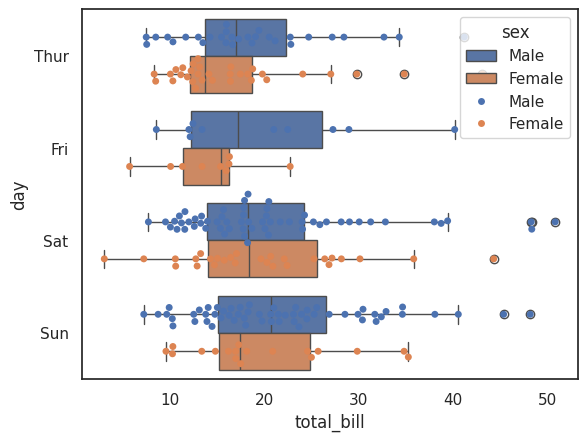

In [21]:
fig, ax = plt.subplots()

sns.boxplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, ax=ax)

## Change the position of a legend

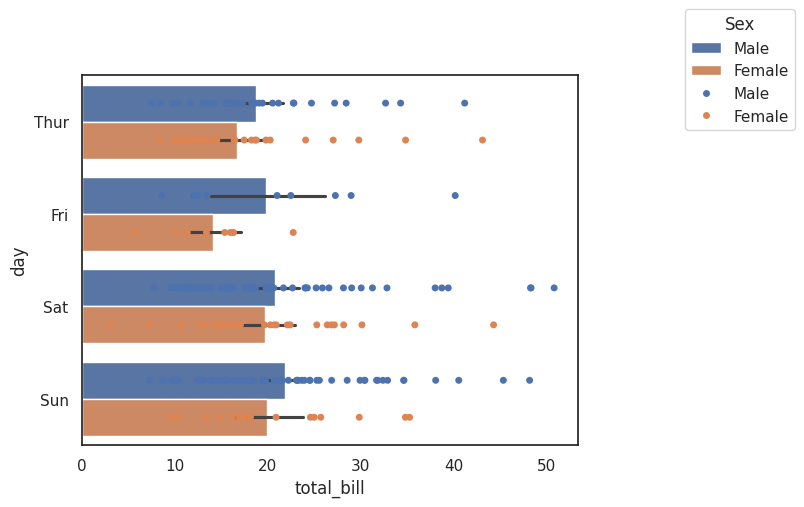

In [22]:
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

ax.legend(title="Sex", loc="upper left", bbox_to_anchor=(1.2, 1.2))

__Exercise: change the location of the legend so it doesn't overlap with the spine.__

__Exercise: change the `loc=` to see if you can align the legend to top.__

## Remove spines

On the published plots, there aren't top and right spines. So we need to know how to remove ours as well.

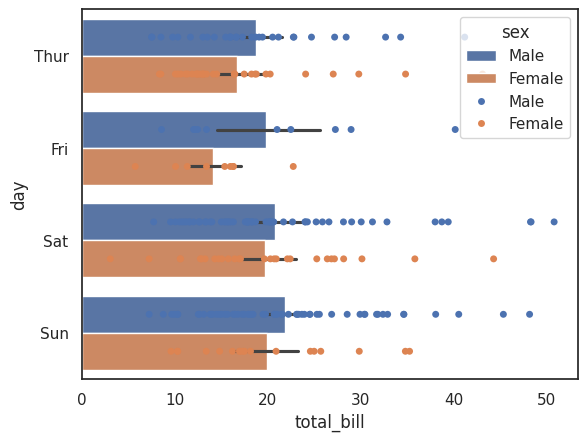

In [23]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Remove spines
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

__Exercise: remove top and right spines.__

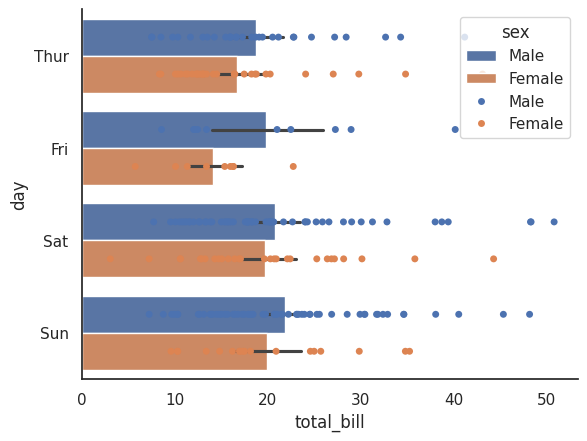

In [24]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

## Trim spines

__Question: do you still remember what trim spines mean?__

(0.0, 53.350500000000004)

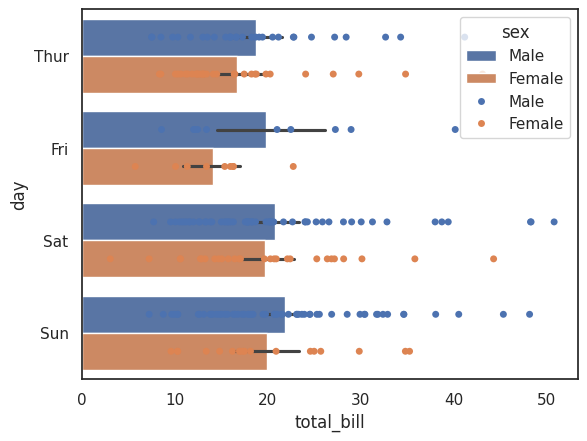

In [25]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Trim the right spine by adjusting x-axis limit
ax.set_xlim(0, ax.get_xlim()[1]) 

__Exercise: change the limit of the x axis to 60.__

(0.0, 60.0)

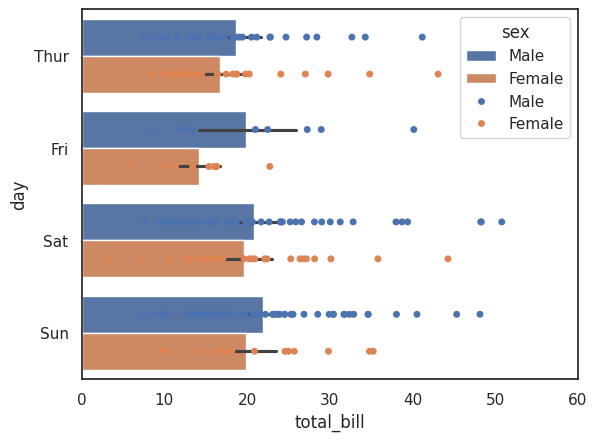

In [26]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Trim the right spine by adjusting x-axis limit
ax.set_xlim(0, 60) 

## Add x label, y label, and title

Text(0.5, 1.0, 'Total Bill by Day and Sex')

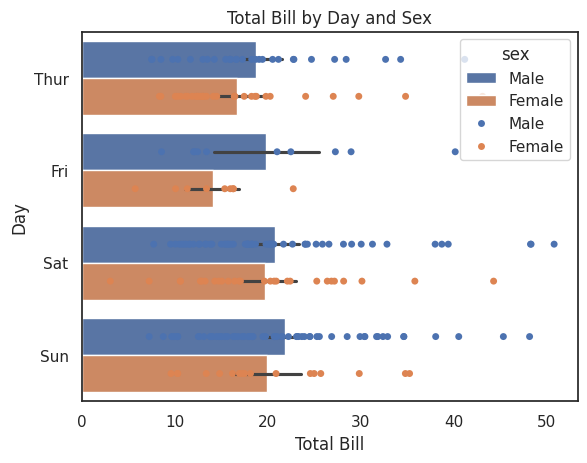

In [27]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Add x-label, y-label, and title
ax.set_xlabel('Total Bill')
ax.set_ylabel('Day')
ax.set_title('Total Bill by Day and Sex')

## How to add 2 lines of axis labels and how to write superscripted text?

`\n` represents new line character in python, and we can use LaTeX formatting to write superscripted text. 

Text(0.5, 1.0, 'Total Bill by Day and Sex')

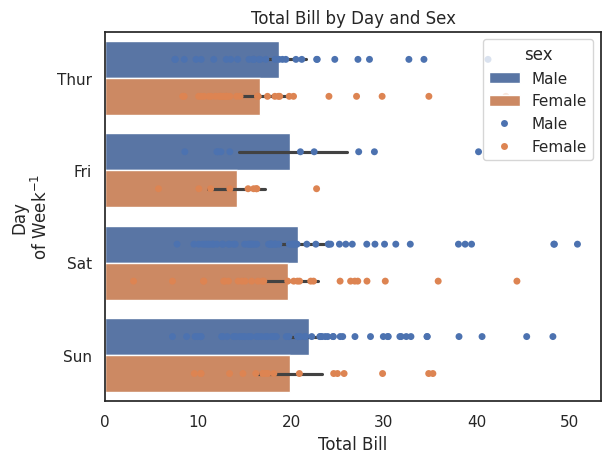

In [28]:
tips = sns.load_dataset("tips")
fig, ax = plt.subplots()

sns.barplot(data=tips, x="total_bill", y="day", hue="sex", ax=ax)
sns.stripplot(data=tips, x="total_bill", y="day", hue="sex", dodge=True, jitter=False, ax=ax)

# Add x-label, y-label, and title
ax.set_xlabel('Total Bill')
ax.set_ylabel('Day\nof Week$^{-1}$')
ax.set_title('Total Bill by Day and Sex')

## Time to recreate the plots

The data was downloaded from this [link](https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-024-07410-3/MediaObjects/41586_2024_7410_MOESM11_ESM.xlsx). 

The data is not in a format that can be used by matplotlib and seaborn directly, we need to transform it.

You can use either excel or python to transform it. 

## Import Excel sheet to Python using Pandas

In [29]:
!pip install pandas openpyxl

In [30]:
import pandas as pd

df_plot1 = pd.read_excel("data/paper01_leukaemia_fig03_data.xlsx", sheet_name="Sheet1")

In [31]:
df_plot1.head()

,Time (minutes),1.30399,7.741756,14.176931,20.708604,27.147984,33.586553,40.120818,46.564522,53.012884,59.545184,65.992631,72.441282
0,NTC#1,48.347040,45.357264,44.513132,19.749405,19.589452,20.124427,68.343392,42.820275,31.447765,8.037251,6.597382,6.659366
1,NTC#1,46.399661,39.244685,41.310064,24.379167,23.755501,25.300993,73.555178,49.381710,38.289043,12.198430,11.065442,10.392746
2,NTC#1,54.448673,48.695016,45.935808,20.947954,20.031843,22.079016,70.933314,45.220850,34.329460,10.109069,8.496344,9.170507
3,NTC#1,49.802903,43.693055,41.795104,18.467535,18.427467,20.103820,62.359127,38.060493,28.963210,7.415496,6.675511,6.478812
4,NTC#1,47.983328,43.781862,41.858042,17.895075,17.305370,19.113937,63.196425,39.337364,31.514848,9.545977,8.555628,9.174845


## `melt()` - Transform a DataFrame from wide format to long format

The dataframe now in a wide format with times as column names, we want to expand these times to make them a column as well. We can use `melt()` to do that. 

In [32]:
# get all the time values to a list, we need to use it in the melt function
time_values = df_plot1.columns.tolist()[1:]

# melt function, id_var is the column we keep as the same, value_vars is the list we want to expand 
melted_df_plot1 = pd.melt(df_plot1, id_vars=["Time (minutes)"], value_vars=time_values)

# set new column names
new_column_names = ['category', 'time', 'OCR']
melted_df_plot1.columns = new_column_names

In [33]:
melted_df_plot1

,category,time,OCR
0,NTC#1,1.30399,48.347040
1,NTC#1,1.30399,46.399661
2,NTC#1,1.30399,54.448673
3,NTC#1,1.30399,49.802903
4,NTC#1,1.30399,47.983328
...,...,...,...
355,PIK3CG#2,72.441282,2.488565
356,PIK3CG#2,72.441282,1.666430
357,PIK3CG#2,72.441282,4.822401
358,PIK3CG#2,72.441282,12.160756


## Now it is time for you to create below figure

![05-fig-01](figs/05_addlabel_fig_01.png)

In [34]:
df_plot2 = pd.read_excel("data/paper01_leukaemia_fig03_data.xlsx", sheet_name="Sheet2")

new_name = {'Unnamed: 0': 'category'}
df_plot2 = df_plot2.rename(columns=new_name)

melted_df_plot2 = pd.melt(df_plot2, id_vars=["category"], value_vars=['Basal', 'Maximal', 'ATP'])
melted_df_plot2.head()

,category,variable,value
0,NTC#1,Basal,37.915752
1,NTC#1,Basal,30.244621
2,NTC#1,Basal,37.439465
3,NTC#1,Basal,35.119595
4,NTC#1,Basal,33.302414


/tmp/ipykernel_2178/1234825582.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


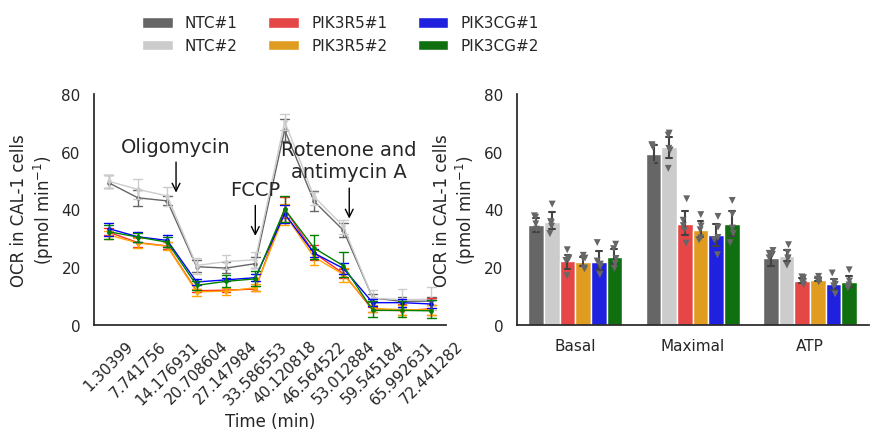

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

category_colours = {
    'NTC#1': '.4',
    'NTC#2': '.8',
    'PIK3R5#1': '#ff2c2c',
    'PIK3R5#2': 'orange',
    'PIK3CG#1': 'blue',
    'PIK3CG#2': 'green'
}

category_colours2 = {
    'NTC#1': '.4',
    'NTC#2': '.4',
    'PIK3R5#1': '.4',
    'PIK3R5#2': '.4',
    'PIK3CG#1': '.4',
    'PIK3CG#2': '.4'
}

sns.pointplot(
    data=melted_df_plot1, x='time', y='OCR', hue='category', legend=False,
    ax=ax1, palette=category_colours, linewidth=1, capsize=.3
)

sns.barplot(
    data=melted_df_plot2, x='variable', y='value', hue='category', 
    palette=category_colours, ax=ax2, capsize=.3, err_kws={'linewidth': 1.5}
)

sns.stripplot(
    data=melted_df_plot2, x='variable', y='value', hue='category', dodge=True, legend=False,
    ax=ax2, palette=category_colours2, marker='v'
)

ax2.legend(title='', ncol=3, loc='upper center', bbox_to_anchor=(-0.5, 1.4), frameon=False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.annotate('Oligomycin', xy=(2.3,45), xytext=(2.3,60), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('FCCP', xy=(5,30), xytext=(5,45), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('Rotenone and\nantimycin A', xy=(8.2,36), xytext=(8.2,51), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim(0,80)
ax2.set_ylim(0,80)

ax1.set_xlabel("Time (min)")
ax1.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")
ax2.set_xlabel('')
ax2.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")

plt.savefig('my_plot.pdf', bbox_inches='tight') 

/tmp/ipykernel_2178/1837839175.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


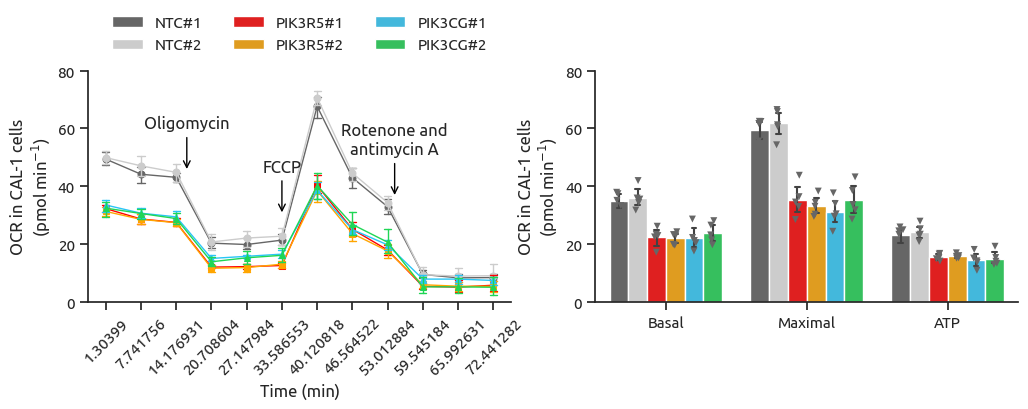

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Ubuntu'

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

category_colours = {
    'NTC#1': '.4',
    'NTC#2': '.8',
    'PIK3R5#1': '#ff0000',
    'PIK3R5#2': '#ffa500',
    'PIK3CG#1': '#29c5f6',
    'PIK3CG#2': '#1fd655'
}

category_colours2 = {
    'NTC#1': '.4',
    'NTC#2': '.4',
    'PIK3R5#1': '.4',
    'PIK3R5#2': '.4',
    'PIK3CG#1': '.4',
    'PIK3CG#2': '.4'
}

markers1 = ['o', 'o', 's', 's', '^', '^']
markers2 = {
    'NTC#1': 'o',
    'NTC#2': 'o',
    'PIK3R5#1': '^',
    'PIK3R5#2': '^',
    'PIK3CG#1': 'v',
    'PIK3CG#2': 'v'
}

sns.pointplot(
    data=melted_df_plot1, x="time", y="OCR", hue="category",
    capsize=.2, legend=False, palette=category_colours, linewidth=1,
    ax=ax1, markers=markers1, markersize=5
)

sns.barplot(
    data=melted_df_plot2, x="variable", y="value", hue="category", 
    legend=True, palette=category_colours, capsize=.2,
    ax=ax2, err_kws={'linewidth': 1.5}
)

sns.stripplot(
    data=melted_df_plot2, x="variable", y="value", hue="category", 
    legend=False, dodge=True, palette=category_colours2, jitter=True,
    ax=ax2, marker='v'
)

ax2.legend(title='', ncol=3, loc='upper center', bbox_to_anchor=(-0.7, 1.3), frameon=False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim(0,80)
ax2.set_ylim(0,80)

ax1.annotate('Oligomycin', xy=(2.3,45), xytext=(2.3,60), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('FCCP', xy=(5,30), xytext=(5,45), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('Rotenone and\nantimycin A', xy=(8.2,36), xytext=(8.2,51), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))

ax1.set_xlabel("Time (min)")
ax1.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")
ax2.set_xlabel('')
ax2.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")

plt.show()

## More plots to recreate

These plots are from this [paper](https://www.nature.com/articles/s41586-024-07425-w#Sec26). Download source data from [here](https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-024-07425-w/MediaObjects/41586_2024_7425_MOESM4_ESM.xlsx). We are using the sheet for fig3i and fig3g.

![plot2](figs/05_published_plot2.png)

![plot3](figs/05_published_plot3.png)

## How to create heatmaps in seaborn

<Axes: xlabel='Task', ylabel='Model'>

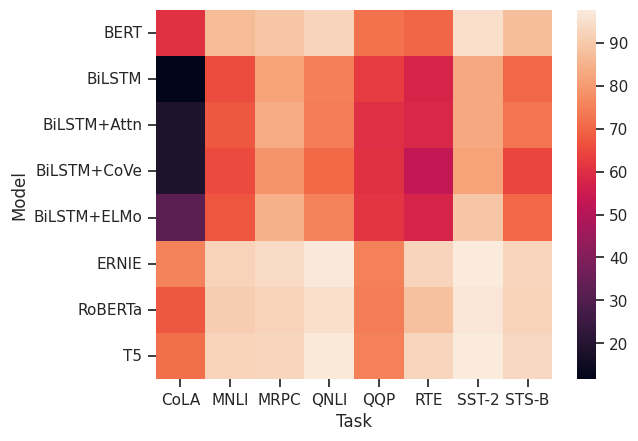

In [37]:
import seaborn as sns

sns.set_theme(style="ticks")
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue)

## How to create line plots in seaborn

<Axes: xlabel='year', ylabel='passengers'>

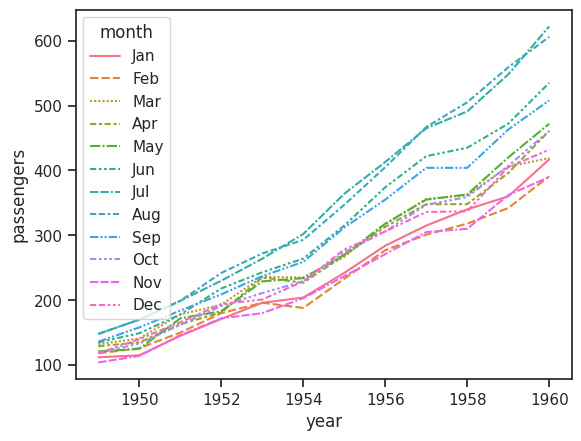

In [38]:
flights = sns.load_dataset("flights")
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month")

## How to use mean and SEM to create line plots

The data we downloaded provides mean and SEM values, so we need to use these two values to create the line plot with error bars.

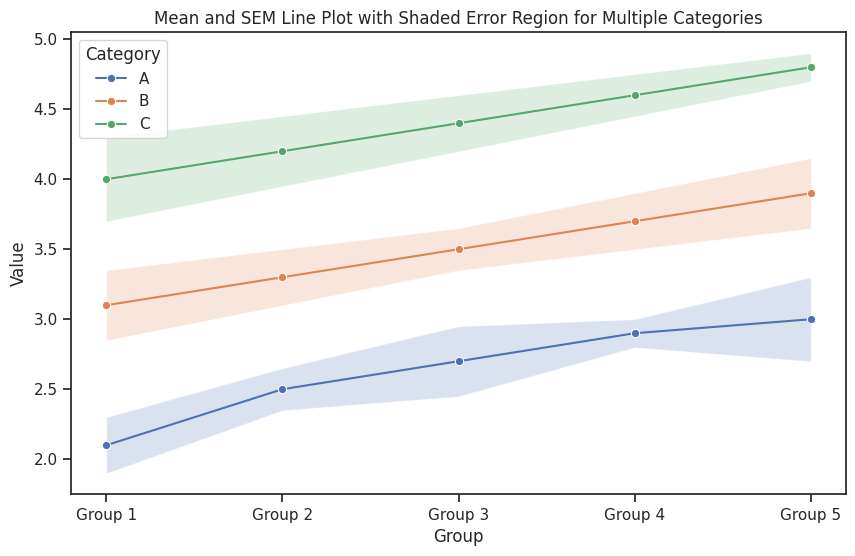

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for mean and SEM
data = {
    'Category': ['A'] * 5 + ['B'] * 5 + ['C'] * 5,
    'Group': ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'] * 3,
    'Mean': [2.1, 2.5, 2.7, 2.9, 3.0, 3.1, 3.3, 3.5, 3.7, 3.9, 4.0, 4.2, 4.4, 4.6, 4.8],
    'SEM': [0.2, 0.15, 0.25, 0.1, 0.3, 0.25, 0.2, 0.15, 0.2, 0.25, 0.3, 0.25, 0.2, 0.15, 0.1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Group' to a categorical type to maintain order in the plot
df['Group'] = pd.Categorical(df['Group'], categories=['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'], ordered=True)

# Plotting with Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Use Seaborn lineplot for the means
sns.lineplot(data=df, x='Group', y='Mean', hue='Category', marker='o')

# Add shaded error regions manually
for category in df['Category'].unique():
    cat_data = df[df['Category'] == category]
    plt.fill_between(cat_data['Group'], cat_data['Mean'] - cat_data['SEM'], cat_data['Mean'] + cat_data['SEM'], alpha=0.2)

plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean and SEM Line Plot with Shaded Error Region for Multiple Categories')
plt.legend(title='Category')

plt.show()

# References

* [Add data labels in a scatter plot using Python Matplotlib | Eugene Tsai](https://medium.com/@marvelouskgc/three-ways-to-add-labels-to-each-data-point-in-a-scatter-plot-in-python-matplotlib-eugene-tsai-42e4094dc07e)
* [ChatGPT](https://chatgpt.com)
* [How to add arrows on a figure in Matplotlib](https://www.scaler.com/topics/matplotlib/arrow-in-matplotlib/)